In [71]:
path = "../results/agnews/qwen/CAPO/seed43/benchmark_experiment_agnews_qwen_CAPO_43/d68fc10ed5808b22bcc05bf52807a08e381e40af3e141ec4bcd12359f96161a9/step_results_eval.csv"

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
df = pd.read_csv(path)
df

,step,timestamp,time_elapsed,score,prompt,input_tokens_meta_llm,output_tokens_meta_llm,input_tokens_downstream_llm,output_tokens_downstream_llm,test_score
0,1,2025-03-16 07:01:55.630194,301.327093,0.831282,You are a news categorization system. Read the...,1361,452,480697,42249,0.784
1,1,2025-03-16 07:01:55.630194,301.327093,0.820717,Determine the appropriate category for the fol...,1361,452,480697,42249,0.798
2,1,2025-03-16 07:01:55.630194,301.327093,0.806828,We're building a news classifier and need your...,1361,452,480697,42249,0.790
3,1,2025-03-16 07:01:55.630194,301.327093,0.792056,News article classification task: Categorize t...,1361,452,480697,42249,0.754
4,1,2025-03-16 07:01:55.630194,301.327093,0.762513,Classify this news article into one of these c...,1361,452,480697,42249,0.788
...,...,...,...,...,...,...,...,...,...,...
1219,102,2025-03-16 08:51:01.063419,52.118718,0.860670,"For this task, you will serve as a news catego...",1743,705,72023,4376,0.794
1220,102,2025-03-16 08:51:01.063419,52.118718,0.860514,"For this assignment, you need to carefully ana...",1743,705,72023,4376,0.796
1221,102,2025-03-16 08:51:01.063419,52.118718,0.860202,"For this task, you will serve as a news catego...",1743,705,72023,4376,0.808
1222,102,2025-03-16 08:51:01.063419,52.118718,0.860202,"For this assignment, you'll act as a news clas...",1743,705,72023,4376,0.808


In [74]:
df["total_tokens"] = (
    df["output_tokens_meta_llm"]
    + df["input_tokens_meta_llm"]
    + df["output_tokens_downstream_llm"]
    + df["input_tokens_downstream_llm"]
)
df["total_tokens"] = df["total_tokens"].cumsum()

In [75]:
# cum of tokens
df["output_tokens_downstream_llm_cum"] = df["output_tokens_downstream_llm"].cumsum()
df["output_tokens_meta_llm_cum"] = df["output_tokens_meta_llm"].cumsum()
df["input_tokens_downstream_llm_cum"] = df["input_tokens_downstream_llm"].cumsum()
df["input_tokens_meta_llm_cum"] = df["input_tokens_meta_llm"].cumsum()

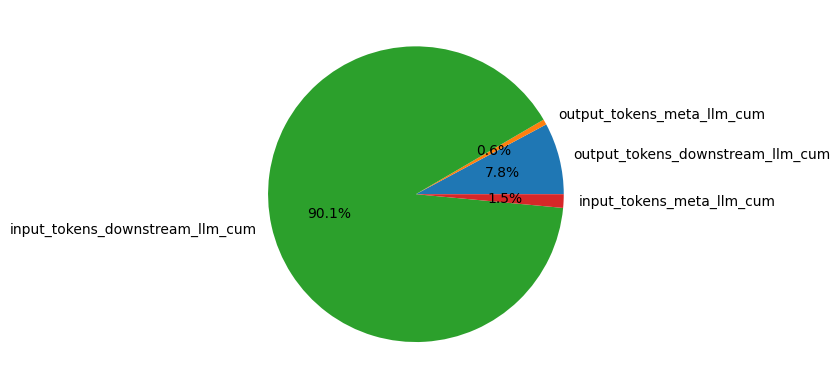

In [76]:
# plot pie
fig, ax = plt.subplots()
ax.pie(
    [
        df["output_tokens_downstream_llm_cum"].iloc[-1],
        df["output_tokens_meta_llm_cum"].iloc[-1],
        df["input_tokens_downstream_llm_cum"].iloc[-1],
        df["input_tokens_meta_llm_cum"].iloc[-1],
    ],
    labels=[
        "output_tokens_downstream_llm_cum",
        "output_tokens_meta_llm_cum",
        "input_tokens_downstream_llm_cum",
        "input_tokens_meta_llm_cum",
    ],
    autopct="%1.1f%%",
)
plt.show()

In [77]:
df["n_shots"] = df["prompt"].str.count("Input:") - 1

In [78]:
df["prompt_len"] = df["prompt"].str.len()

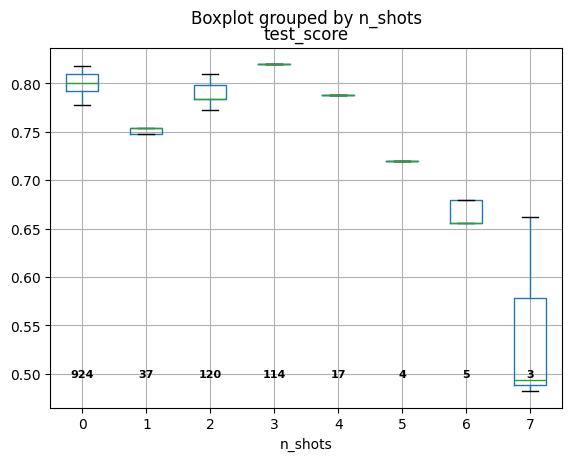

In [79]:
# correlation between number shots and score => boxplot, and give number of samples per n_shots
fig = df.boxplot(column="test_score", by="n_shots", showfliers=False)
# add number of samples per n_shots
num_samples = df.groupby("n_shots").size()
for i, n in enumerate(num_samples):
    fig.text(
        i + 1,
        0.5,
        n,
        ha="center",
        va="center",
        rotation=0,
        fontsize=8,
        color="black",
        fontweight="bold",
    )

plt.show();

In [80]:
# group df by step and get the mean of the values (ignore stings)
df_grouped = df.groupby("step", as_index=False).mean(numeric_only=True)
# df_grouped["cum_input_tokens"] = df_grouped["input_tokens_downstream_llm"].cumsum()

# join the maximum score for each step
df_grouped = df_grouped.join(
    df.groupby("step", as_index=False).max()[["step", "score"]].set_index("step"),
    on="step",
    rsuffix="_max",
)

df_grouped

,step,time_elapsed,score,input_tokens_meta_llm,output_tokens_meta_llm,input_tokens_downstream_llm,output_tokens_downstream_llm,test_score,total_tokens,output_tokens_downstream_llm_cum,output_tokens_meta_llm_cum,input_tokens_downstream_llm_cum,input_tokens_meta_llm_cum,n_shots,prompt_len,score_max
0,1,301.327093,0.699474,1361.0,452.0,480697.0,42249.0,0.679833,3410933.5,274618.5,2938.0,3124530.5,8846.5,3.750000,1317.333333,0.831282
1,2,434.617500,0.712170,1329.0,460.0,830672.0,88861.0,0.736667,12285701.0,1084584.5,8414.0,11167732.0,24970.5,2.750000,1001.583333,0.795405
2,3,144.994443,0.728174,1446.0,482.0,244187.0,14164.0,0.748667,19044785.5,1665386.0,14077.0,17323643.5,41679.0,2.583333,979.916667,0.798972
3,4,64.994762,0.794286,1505.0,585.0,99647.0,8945.0,0.784000,21195753.0,1801430.5,20530.5,19314377.5,59414.5,1.666667,700.166667,0.835016
4,5,147.342124,0.770935,1546.0,617.0,242952.0,16958.0,0.784333,23507978.5,1960855.0,27758.5,21441624.0,77741.0,1.583333,684.000000,0.802695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,41.994841,0.862292,1674.0,651.0,65255.0,4396.0,0.806333,129768468.0,10189430.0,745903.5,116947517.5,1885617.0,0.250000,456.666667,0.879128
98,99,34.806467,0.824792,1746.0,715.0,48801.0,4049.0,0.806333,130523857.5,10239926.5,754131.5,117623626.5,1906173.0,0.250000,456.666667,0.844003
99,100,37.791627,0.862292,1649.0,607.0,58869.0,4713.0,0.806333,131256015.0,10292830.5,762009.5,118274680.5,1926494.5,0.250000,456.666667,0.879128
100,101,53.313723,0.824792,1727.0,668.0,65581.0,6108.0,0.806333,132099670.0,10358454.0,769690.0,119024736.5,1946789.5,0.250000,456.666667,0.844003


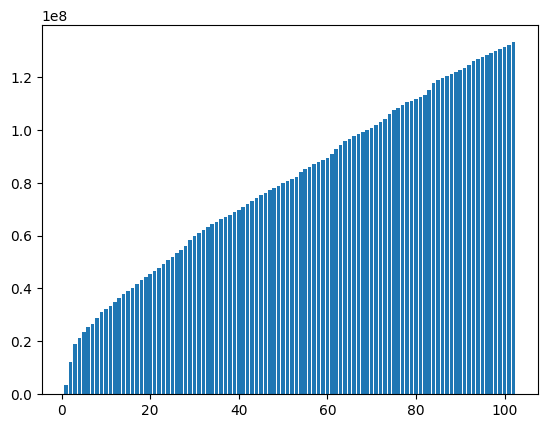

In [114]:
# plot step vs total tokens
plt.bar(df_grouped["step"], df_grouped["total_tokens"]);

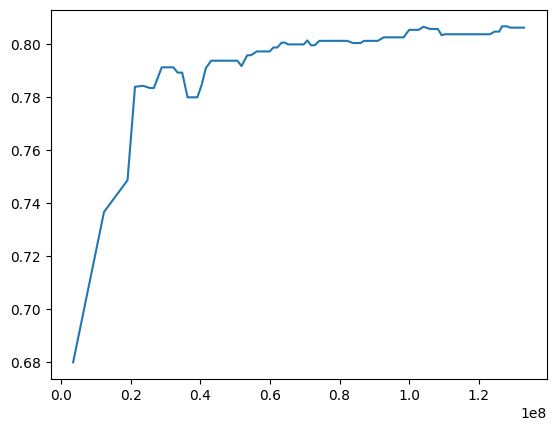

In [116]:
# plot token count vs step and adapt y-axis to min and max
column = "test_score"
plt.plot(df_grouped["total_tokens"], df_grouped[column])
plt.show();

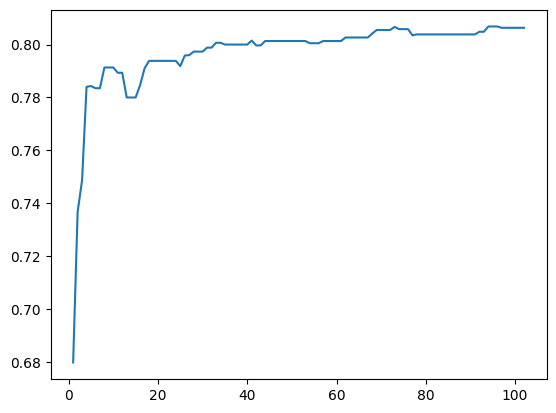

In [83]:
# plot token count vs step and adapt y-axis to min and max
column = "test_score"
plt.plot(df_grouped["step"], df_grouped[column])
plt.show();

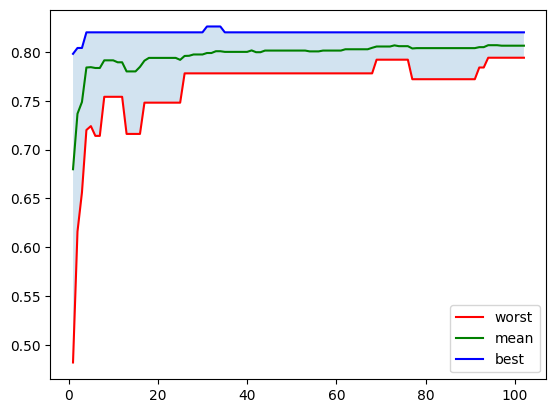

In [84]:
# x_axis => step, y_axis => worst_score, mean_score, best_score
col = "test_score"

worst_scores = df.groupby("step", as_index=False).min(numeric_only=True)[["step", col]]
mean_scores = df.groupby("step", as_index=False).mean(numeric_only=True)[["step", col]]
best_scores = df.groupby("step", as_index=False).max(numeric_only=True)[["step", col]]

plt.plot(worst_scores["step"], worst_scores[col], label="worst", color="red")
plt.plot(mean_scores["step"], mean_scores[col], label="mean", color="green")
plt.plot(best_scores["step"], best_scores[col], label="best", color="blue")
# fill area between lines
plt.fill_between(mean_scores["step"], worst_scores[col], best_scores[col], alpha=0.2)
plt.legend()
plt.show();

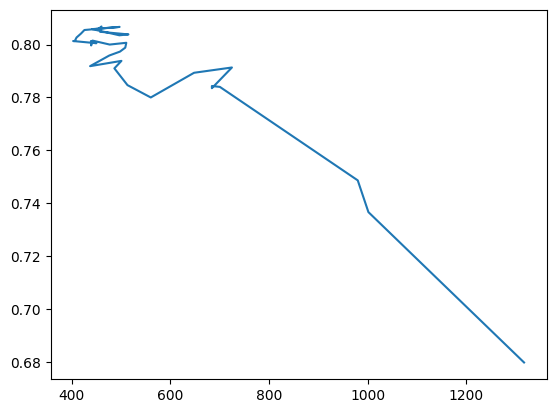

In [85]:
# plot score vs prompt length
plt.plot(df_grouped["prompt_len"], df_grouped["test_score"])
plt.show();

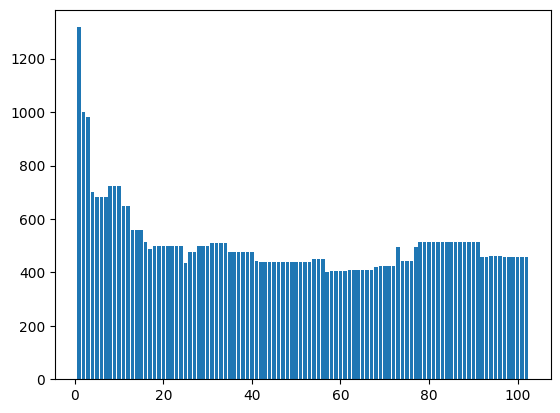

In [86]:
# prompt length vs step
plt.bar(df_grouped["step"], df_grouped["prompt_len"]);

### Analyze best prompts per step

In [87]:
df_best = df.groupby("step").apply(lambda x: x.nlargest(1, "score")).reset_index(drop=True)
# df_best

C:\Users\tzehl\AppData\Local\Temp\ipykernel_4056\373190983.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_best = df.groupby("step").apply(lambda x: x.nlargest(1, "score")).reset_index(drop=True)


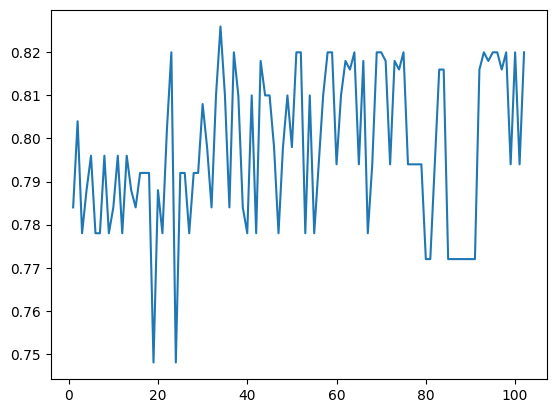

In [88]:
# max a line plot of the best score vs step
plt.plot(df_best["step"], df_best["test_score"]);

## Analyze Racing

In [89]:
from pprint import pprint as pp

p = lambda x: (pp(x.replace("\r", ""), compact=True, width=200))

In [90]:
df["test_score"].nlargest(10)

362    0.826
377    0.826
395    0.826
396    0.826
41     0.820
49     0.820
64     0.820
76     0.820
85     0.820
100    0.820
Name: test_score, dtype: float64

In [91]:
# best prompt
col = "test_score"
k_best = 1

best_prompt = df[df[col] == df[col].nlargest(k_best).values[k_best - 1]]
print("unique?", len(best_prompt["prompt"].unique()))
print("number of shots: ", best_prompt["n_shots"].values[0])
print("score: ", best_prompt[col].values[0])
print("first occurence: ", best_prompt["step"].values[0])
print("last occurence: ", best_prompt["step"].values[-1])
print("last train score: ", best_prompt["score"].values[-1].round(2))

p(best_prompt["prompt"].unique()[0])

unique? 1
number of shots:  1
score:  0.826
first occurence:  31
last occurence:  34
last train score:  0.92
("For this assignment, you'll act as a news classification assistant. Your job is to carefully analyze the given news article and assign it to one of the four designated categories: World, Sports, "
 "Business, or Sci/Tech. Your task is to determine which category most accurately represents the article's content. Please structure your answer as <final_answer>chosen category</final_answer> to "
 'facilitate proper system recognition.\n'
 '\n'
 'Input: Australian Media Giant Posts Earnings Jump Australian media empire Publishing  amp; Broadcasting Ltd. reported Thursday a 75 percent jump in earnings for the fiscal year ending June 30, '
 'thanks to a strong economy and a rebound in advertising revenue.\n'
 'Output: <final_answer>Business</final_answer>\n'
 '\n'
 'Input:')


In [92]:
# load the prompt scores per block
path = path.replace("step_results_eval", "prompt_scores")

df_blocks = pd.read_csv(path)
# round all numbers to 2 decimal places
df_blocks = df_blocks.round(2)

df_blocks

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,Act as a news classification assistant and ide...,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Act as a news classification assistant and ide...,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,After a thorough analysis of the content of th...,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,After a thorough analysis of the content of th...,0.83,0.73,0.87,0.80,0.73,NaN,NaN,NaN,NaN,NaN
4,After analyzing the content of the news articl...,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
412,You are tasked with classifying news articles ...,0.80,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,You are tasked with classifying news articles ...,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,You are tasked with classifying news articles ...,0.77,0.70,0.70,0.73,NaN,NaN,NaN,NaN,NaN,NaN
415,Your role is to function as a news classificat...,0.83,0.80,0.87,0.73,0.87,0.87,0.73,0.7,0.73,0.77


In [93]:
# get number of blocks per prompt by counting non nans per columns
n_blocks = df_blocks.count(axis=1) - 1

In [94]:
n_blocks

0       1
1       1
2       1
3       5
4       1
       ..
412     2
413     1
414     4
415    10
416     1
Length: 417, dtype: int64

In [95]:
df_count = pd.DataFrame({"n_blocks": n_blocks.values, "prompt": df_blocks["Unnamed: 0"]})

In [96]:
df_count["n_blocks"].value_counts()

n_blocks
1     285
10     58
2      40
3      16
5       6
4       6
9       3
6       2
8       1
Name: count, dtype: int64

In [97]:
# join with df
df_count = df_count.join(df.set_index("prompt"), on="prompt", how="left", lsuffix="_rrr")

# bin by test_score
df_count["test_score_bin"] = pd.cut(df_count["test_score"], bins=5)

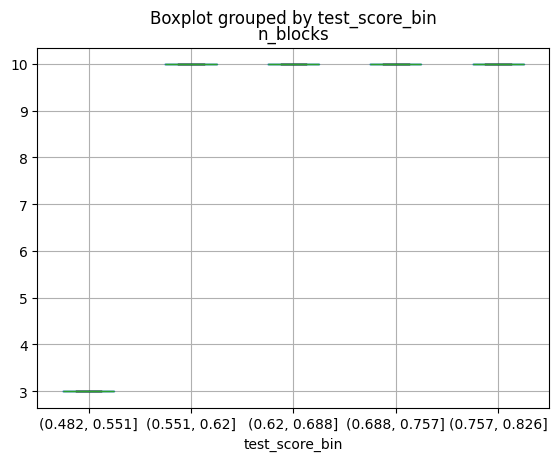

In [98]:
# evals vs score => boxplot
df_count.boxplot(column="n_blocks", by="test_score_bin");

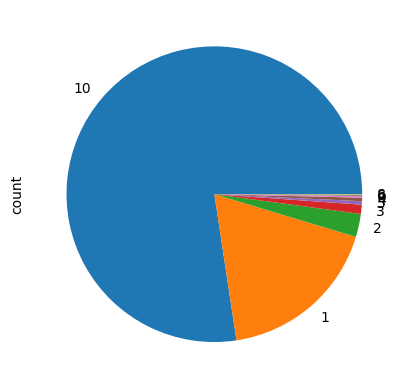

In [99]:
# pie chart of number of blocks per prompt
df_count["n_blocks"].value_counts().plot.pie();

In [100]:
# clculate the number of saved evaluations, so how many differ by how much from 10 in n_blocks
df_count["n_blocks_diff"] = abs(df_count["n_blocks"] - 10)
n_blocks_diff_times_n = (
    df_count["n_blocks_diff"].value_counts() * df_count["n_blocks_diff"].value_counts().index
)
n_blocks_diff_times_n.sum()

3076

In [101]:
# total number of evaluations
df_count["n_blocks"].sum()

12804

In [117]:
# tokens saved
(n_blocks_diff_times_n.sum()) / (n_blocks_diff_times_n.sum() + df_count["n_blocks"].sum())

0.19370277078085643

In [102]:
df_count["n_blocks"].describe()

count    1588.000000
mean        8.062972
std         3.626871
min         1.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: n_blocks, dtype: float64

In [118]:
df

,step,timestamp,time_elapsed,score,prompt,input_tokens_meta_llm,output_tokens_meta_llm,input_tokens_downstream_llm,output_tokens_downstream_llm,test_score,total_tokens,output_tokens_downstream_llm_cum,output_tokens_meta_llm_cum,input_tokens_downstream_llm_cum,input_tokens_meta_llm_cum,n_shots,prompt_len
0,1,2025-03-16 07:01:55.630194,301.327093,0.831282,You are a news categorization system. Read the...,1361,452,480697,42249,0.784,524759,42249,452,480697,1361,2,780
1,1,2025-03-16 07:01:55.630194,301.327093,0.820717,Determine the appropriate category for the fol...,1361,452,480697,42249,0.798,1049518,84498,904,961394,2722,2,728
2,1,2025-03-16 07:01:55.630194,301.327093,0.806828,We're building a news classifier and need your...,1361,452,480697,42249,0.790,1574277,126747,1356,1442091,4083,0,255
3,1,2025-03-16 07:01:55.630194,301.327093,0.792056,News article classification task: Categorize t...,1361,452,480697,42249,0.754,2099036,168996,1808,1922788,5444,1,498
4,1,2025-03-16 07:01:55.630194,301.327093,0.762513,Classify this news article into one of these c...,1361,452,480697,42249,0.788,2623795,211245,2260,2403485,6805,3,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,102,2025-03-16 08:51:01.063419,52.118718,0.860670,"For this task, you will serve as a news catego...",1743,705,72023,4376,0.794,133137908,10427056,779004,119961616,1970232,0,422
1220,102,2025-03-16 08:51:01.063419,52.118718,0.860514,"For this assignment, you need to carefully ana...",1743,705,72023,4376,0.796,133216755,10431432,779709,120033639,1971975,0,424
1221,102,2025-03-16 08:51:01.063419,52.118718,0.860202,"For this task, you will serve as a news catego...",1743,705,72023,4376,0.808,133295602,10435808,780414,120105662,1973718,0,444
1222,102,2025-03-16 08:51:01.063419,52.118718,0.860202,"For this assignment, you'll act as a news clas...",1743,705,72023,4376,0.808,133374449,10440184,781119,120177685,1975461,0,439
